In [25]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-
'''
@File    :   assignment2-weather.ipynb
@Time    :   2024/10/08 20:22:53
@Author  :   Guillermo Martin
@Version :   1.0
@Personal email : gfmg1992@hotmail.com
@Student email: G00438885@atu.ie
@License :   (C)Copyright 2023, Guillermo Martin
@Desc    :   First Assignment. Load metEirean weather data and make a nice plot 
'''
#

'\n@File    :   assignment2-weather.ipynb\n@Time    :   2024/10/08 20:22:53\n@Author  :   Guillermo Martin\n@Version :   1.0\n@Personal email : gfmg1992@hotmail.com\n@Student email: G00438885@atu.ie\n@License :   (C)Copyright 2023, Guillermo Martin\n@Desc    :   First Assignment. Load metEirean weather data and make a nice plot \n'

In [26]:
# First we import libraries we willl use
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [55]:
# We can now import the data from the repository 
# Although I could have imported it from a locally saved .csv file, I
# saw that you can import it directly from an url, so I just imported it from Andrew's github directly
#Reference: https://stackoverflow.com/questions/55240330/how-to-read-csv-file-from-github-using-pandas
url = 'https://raw.githubusercontent.com/andrewbeattycourseware/PFDA-courseware/main/assignment/weatherreadings1.csv'
df = pd.read_csv(url)
#df.info()
#Change Dates to DateTime formats
df['reportEndDateTime'] = pd.to_datetime(df['reportEndDateTime']) #Change the column to DateTime format for plotting 
timediff= df['reportEndDateTime'].diff()
timediff.min()
#df.head(n=2) #Date every 15-30 minutes?

Timedelta('0 days 00:30:00')

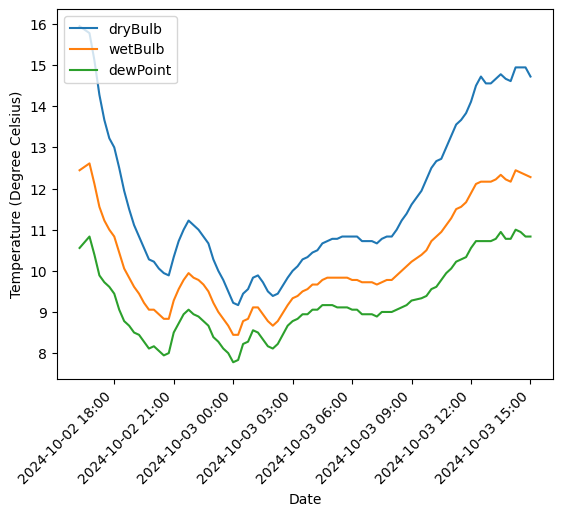

In [37]:
#Temperature columns (tc) in the data to loop over
tc = df.filter(like='Temperature_Celsius', axis=1)
tl = [x.replace('Temperature_Celsius', '') for x in tc] # Rename the labels to make them less redundant

fig, ax = plt.subplots() #Define plot

for i, col in enumerate(tc.columns): #Loop over the temperature columns
    ax.plot(df['reportEndDateTime'], df[col], label=tl[i])

ax.xaxis.set_major_locator(mdates.AutoDateLocator()) #Was not sure how to plot dates: https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M')) #Format of the date as Year month Day, hour minute

plt.xticks(rotation=45,ha='right') #45 degree labels for visualization 
plt.xlabel("Date")
plt.ylabel("Temperature (Degree Celsius)")
plt.legend(loc="upper left")
plt.show()
